# Dimensionality Reduction and Clustering

In this notebook, I perform dimensionality reduction and clustering on the MNIST dataset. 
Thanks to [Nelson](https://github.com/ngriffiths13) for the help printing images with the plot_digits function. 

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_regression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import homogeneity_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.utils import shuffle
from sklearn.metrics import silhouette_score

In [3]:
#Import the MNIST dataset
from sklearn.datasets import fetch_openml
x, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [8]:
x.shape

(70000, 784)

# PCA 

#### a. How many components did you use? Why?

Text(0.5, 1.0, 'Elbow Method')

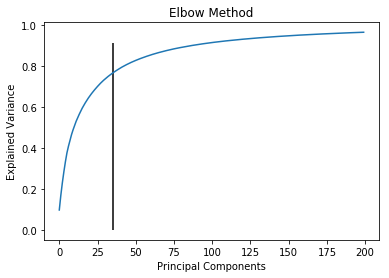

In [15]:
pca = PCA(n_components=200)
x_pca = pca.fit_transform(x)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[100],x=35)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Method')

Using the elbow method, we can see that around 35 components, we stop seeing signicant gains in how much of the variance is explained. So we could choose 35 components.

Another option would be to use the number of components that explain 95% of the variance. 

In [16]:
#explaining 95% of the variance
pca = PCA(n_components=.95)
x_pca = pca.fit_transform(x)
x_pca.shape

(70000, 154)

Based on this method, we could use 154 components. Let's use this method and go with 154 components. 

#### b. Plot the first two components. Do you notice any trends? What is this plot showing us?

Text(0.5, 1.0, 'First Two Components')

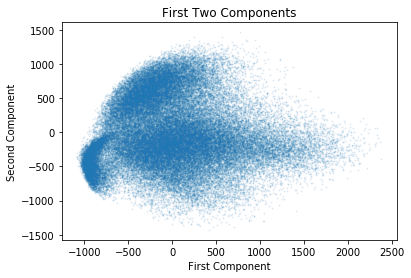

In [20]:
#Plotting first two components
plt.scatter(x_pca[:, 0], X_2dim[:, 1], s=1, alpha=.1)
plt.xlabel('First Component')
plt.ylabel('Second Component')
plt.title('First Two Components')

This plot is showing us the variance between our data in the first two components. It's pretty difficult to see any trends here.

#### c. Why would you use PCA? What is it doing? And what are the drawbacks?

PCA is a way to reduce dimensionality. It does so by projecting our data on the axes that explain the most variance, thus minimizng data loss. It has some drawbacks: linear assumptions and orthonganal transformations. 

#### d. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [74]:
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(28, 28),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

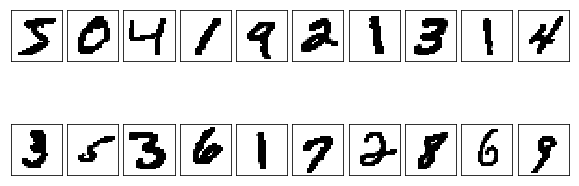

In [75]:
plot_digits(x)

In [77]:
def plot_digits(data):
    fig, axes = plt.subplots(2, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(11, 14),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

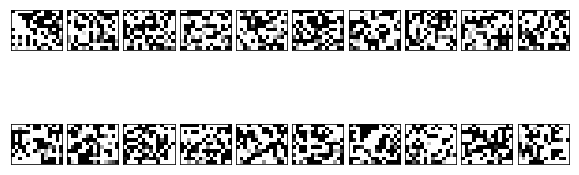

In [79]:
pca = PCA(n_components = 154)
x_pca = pca.fit_transform(x)
plot_digits(x_pca)

When compressed, it's pretty much impossible to distinguish which numbers are which. 

#  t-SNE

In [85]:
#Using t-SNE to plot first two components
rows = np.arange(7000)
np.random.shuffle(rows)
n_select = 1000

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.019s...
[t-SNE] Computed neighbors for 1000 samples in 0.886s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 472.117868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.537720
[t-SNE] KL divergence after 1000 iterations: 0.973821


In [86]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

Text(0.5, 1.0, 'T-SNE')

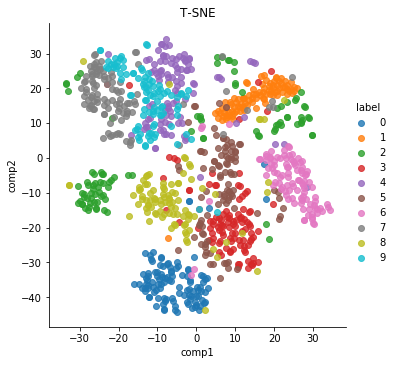

In [87]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

#### a. How does this plot differ from your PCA plot?

This plot is significantly different. You can actually see different clusters and there is distance between them. You can also see which numbers the model has trouble telling apart, due to the overlap.

#### b. How robust is it to changes in perplexity?

[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.012s...
[t-SNE] Computed neighbors for 1000 samples in 0.451s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 402.591410
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.007133
[t-SNE] KL divergence after 1000 iterations: 1.040759


Text(0.5, 1.0, 'T-SNE')

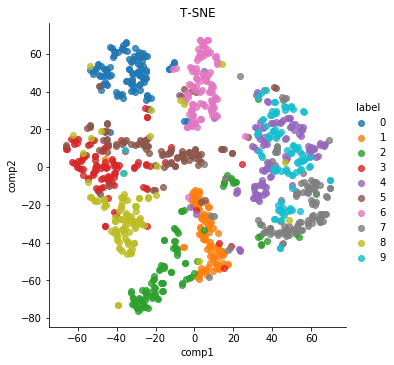

In [88]:
#testing a perplexity of 10 instead of 50
tsne = TSNE(n_components=2, verbose=1, perplexity=10, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

Changing the perplexity from 50 to 10 moves the clusters a little further apart, but doesn't change too much. 

#### c. How robust is it to different learning rate and number of iterations?

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.016s...
[t-SNE] Computed neighbors for 1000 samples in 0.708s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 472.117868
[t-SNE] KL divergence after 50 iterations with early exaggeration: 64.746979
[t-SNE] KL divergence after 1000 iterations: 0.936108


Text(0.5, 1.0, 'T-SNE')

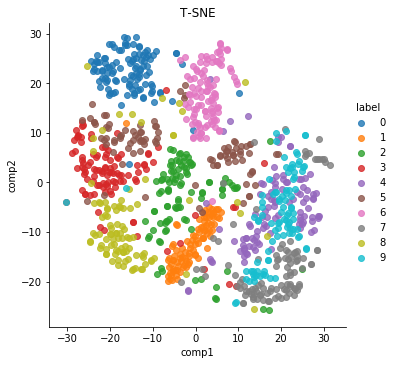

In [90]:
#testing a learning rate of 5 instead of 200
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=5)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.009s...
[t-SNE] Computed neighbors for 1000 samples in 0.548s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 472.117868
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.661911
[t-SNE] KL divergence after 300 iterations: 1.169509


Text(0.5, 1.0, 'T-SNE')

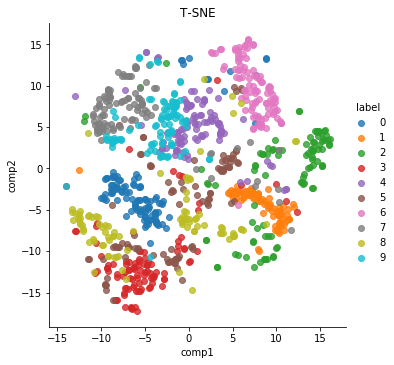

In [91]:
#testing 300 iterations instead of 1000
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300, learning_rate=200)
tsne_results = tsne.fit_transform(x_pca[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('T-SNE')

We can see that changing the learning rate and iterations affects the clusters. I think that 1000 and 200 seem good for iterations and learning rate, but 300 and 5 still have similar results. 

# K-Means Clustering

#### a. How did you choose k?

I can choose my K using contextual knowledge about my dataset. Since the data ranges from 0-9, we want to use k=10 clusters.

In [93]:
#k-means clustering
kmeans = KMeans(n_clusters=10, n_init=50, n_jobs=-1)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=50, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

#### b. How did you evaluate your clustering?
I used the silhouette score to evaluate my clustering

In [94]:
silhouette_score(x, kmeans.labels_, metric='euclidean')

0.05869188629649886

#### c. Visualize your clusters using t-sne

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.073s...
[t-SNE] Computed neighbors for 1000 samples in 2.036s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 553.330936
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.719566
[t-SNE] KL divergence after 1000 iterations: 1.018626


Text(0.5, 1.0, 'K-Means Clustering')

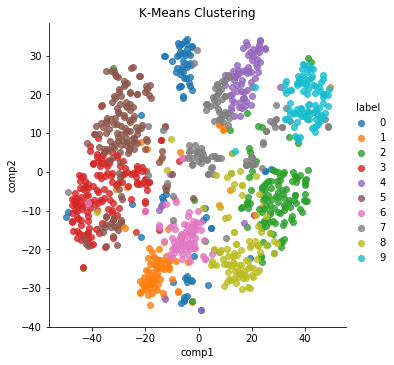

In [95]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=50)
tsne_results = tsne.fit_transform(x[rows[:n_select],:])

df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = kmeans.labels_[rows[:n_select]]

sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)
plt.title('K-Means Clustering')

#### d. Did you scale your data?

I chose to not scale my data. Each feature was already on the same scale, so this didn't seem too important.

#### e. How robust is your clustering?

K-means clustering did ok. It didn't do as well as our previous methods, but it wasn't too bad. 

# Hierarchical Clustering

#### a. Plot your dendrogram

Text(0.5, 1.0, 'Dendrogram')

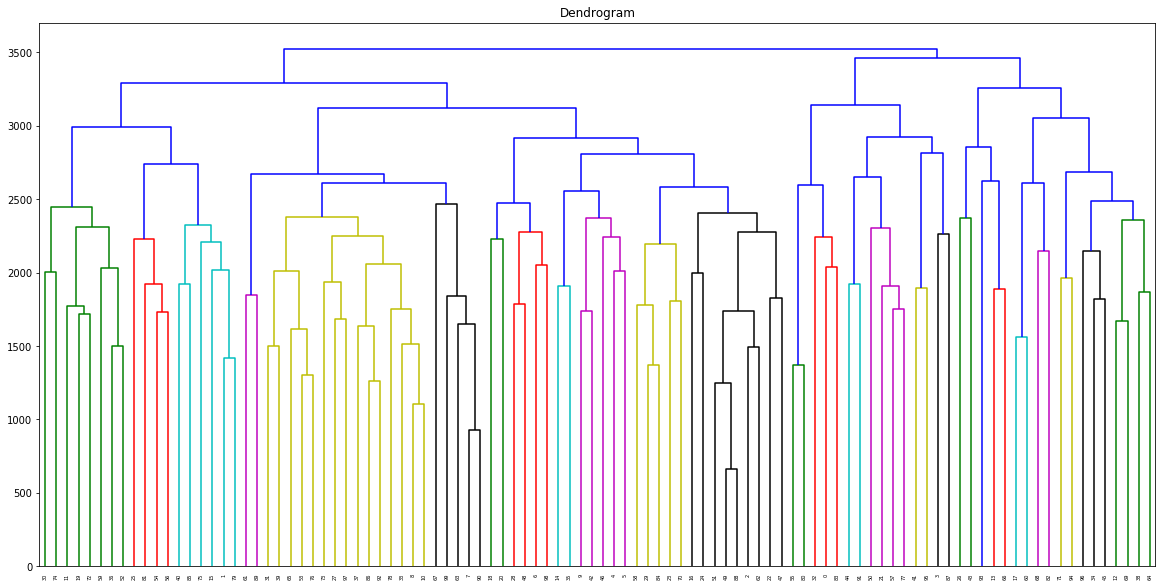

In [4]:
#plotting the dendogram
y = shuffle(x, random_state=0)
Z = linkage(y[0:100], 'complete')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Dendrogram')

#### b. How many clusters seem reasonable based off your graph?

8 or 9 clusters seem reasonable. This makes sense because of the data we're using.

#### c. How does your dendrogram change with different linkage methods?

Text(0.5, 1.0, 'Dendrogram')

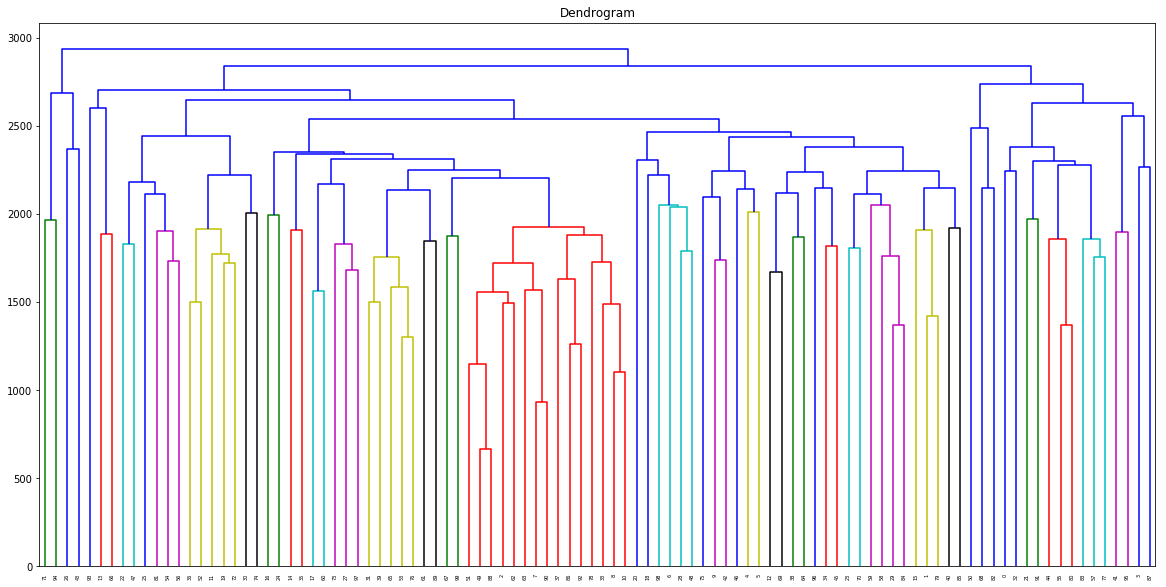

In [5]:
#plotting the dendogram with average
y = shuffle(x, random_state=0)
Z = linkage(y[0:100], 'average')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

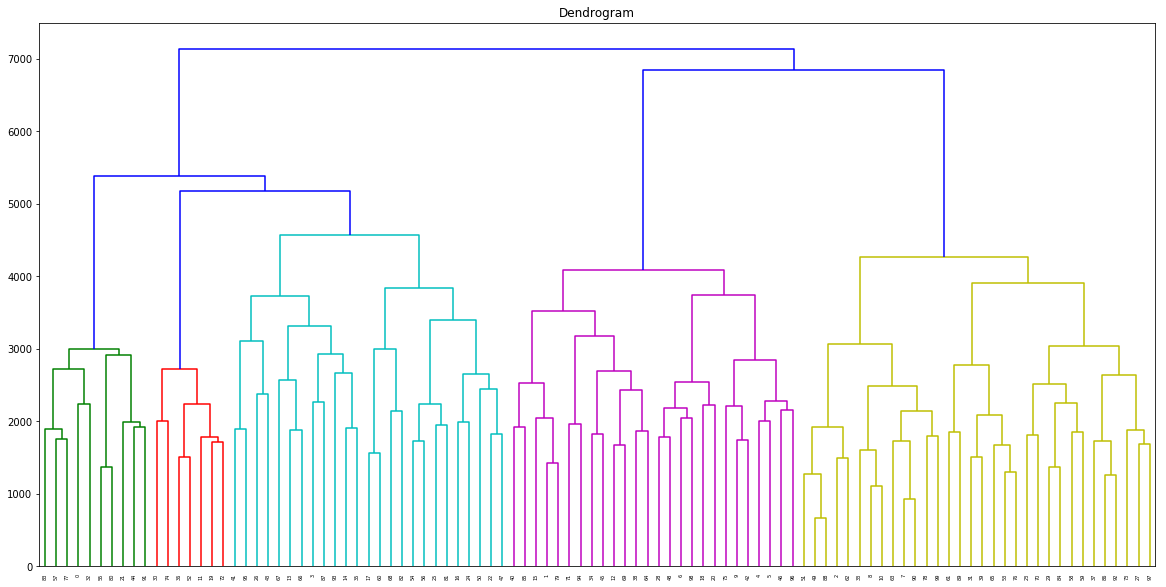

In [6]:
#plotting the dendogram with ward
y = shuffle(x, random_state=0)
Z = linkage(y[0:100], 'ward')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

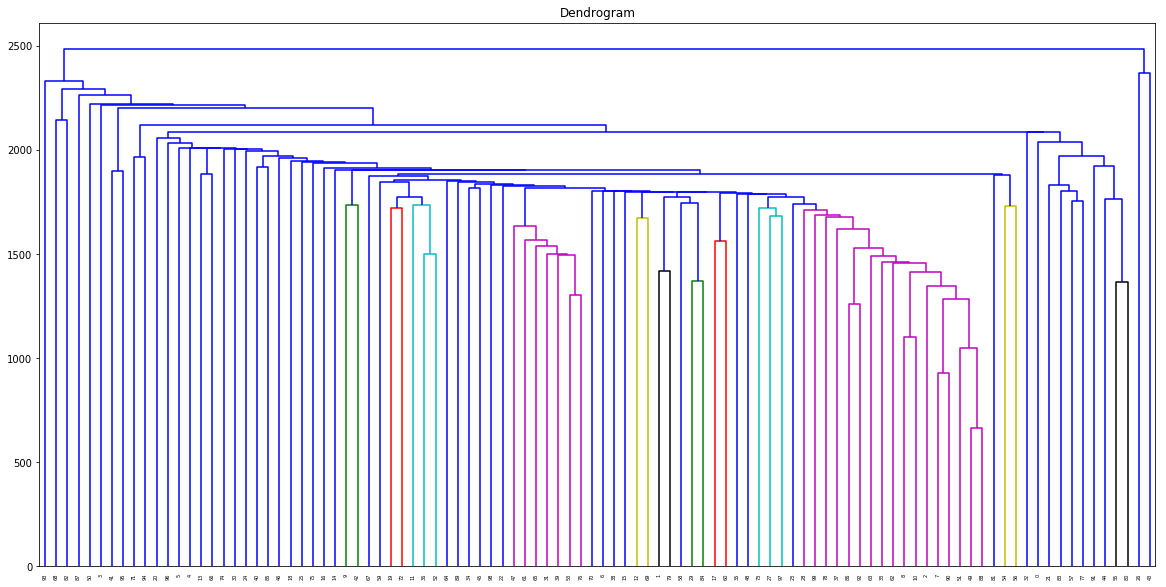

In [7]:
#plotting the dendogram with single
y = shuffle(x, random_state=0)
Z = linkage(y[0:100], 'single')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Dendrogram')

Text(0.5, 1.0, 'Dendrogram')

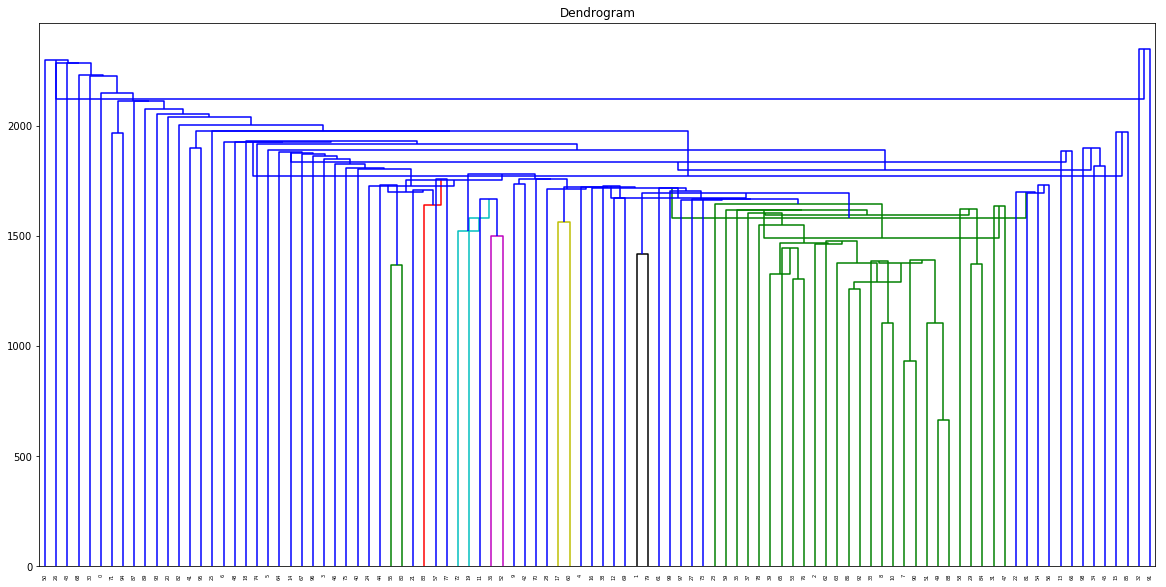

In [8]:
#plotting the dendogram with centroid
y = shuffle(x, random_state=0)
Z = linkage(y[0:100], 'centroid')
plt.figure(figsize=(20, 10))
_ = dendrogram(Z)
plt.title('Dendrogram')

Using different linkage methods results in a dramatically varying dendrograms. Ward seems like the best out of the others we tried.